# Q.5 Support Vector Machine
*   Akshay Bankar (2019201011)



> Import required libraries





In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

 

> Read csv data file using pandas



In [0]:
df = pd.read_csv('/content/drive/My Drive/SMAI/Assignment-2/q5/Train.csv')
text_np = df['text'].to_numpy()
author_np = df['author'].to_numpy()



> **Split data into train and test** : The Corpus will be split into two data sets, Training and Test. The training data set will be used to fit the model and the predictions will be performed on the test data set.This can be done through the train_test_split from the sklearn library



In [0]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(text_np,author_np,test_size=0.2, random_state=42)



> **Label Encoding** : Label encode the target variable — This is done to transform Categorical data of string type in the data set into numerical values which the model can understand.



In [0]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)



> **Word Vectorization** : It is a general process of turning a collection of text documents into numerical feature vectors.Their are many methods to convert text data to vectors which the model can understand but by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency — Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

    Term Frequency: This summarizes how often a given word appears within a document.
    Inverse Document Frequency: This down scales words that appear a lot across documents.



> TF-IDF are word frequency scores that try to highlight words that are more interesting





In [13]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
fit_data=tfidf_vectorizer.fit(text_np)#_transform(Train_X)
Train_X_Tfidf = fit_data.transform(Train_X)
print(np.shape(Train_X_Tfidf))
Test_X_Tfidf = fit_data.transform(Test_X)

(12530, 23058)




> **Train and Predict** : Use Sklean's SVC to train and predict the outcome and report the accuracy. 



In [14]:
SVM = svm.SVC(C=1.0, kernel='linear', gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)# predict the labels on validation datase
#Z = SVM.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
#ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
#ax.scatter(SVM.support_vectors_[:, 0], SVM.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
predictions_SVM = SVM.predict(Test_X_Tfidf)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(Test_Y, predictions_SVM)*100)
print("confussion Matrix:->", confusion_matrix(Test_Y, predictions_SVM))
print("F1-score -> ", f1_score(Test_Y, predictions_SVM, average = None))

SVM Accuracy Score ->  81.74273858921161
confussion Matrix:-> [[1089   78  122]
 [ 131  651   41]
 [ 154   46  821]]
F1-score ->  [0.81787458 0.81476846 0.81895262]




> **Plot support vectors**, decision boundary and margins



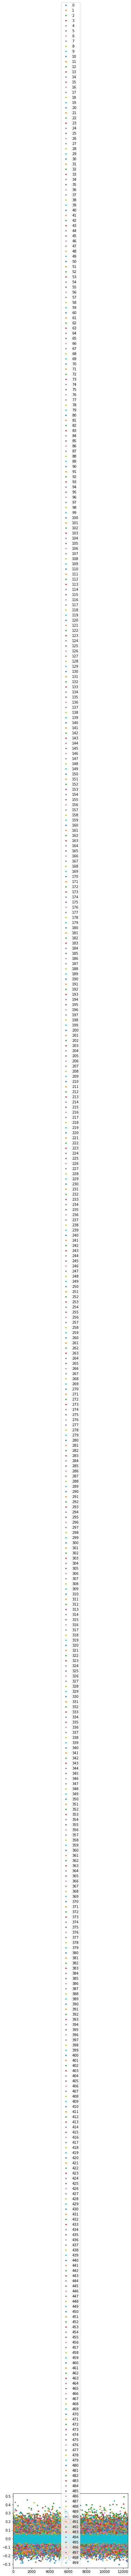

In [8]:
from sklearn.decomposition import PCA
train_array = Train_X_Tfidf.toarray()
pca = PCA(n_components=500)
train_pca=pca.fit_transform(train_array)
dataframe = pd.DataFrame(train_pca)
dataframe.head()
dataframe.plot(style='.')



> **Test with different parameters** of the SVM. This is done using Sklearn's LinearSVC().



In [15]:
params = [ ['l2', 'hinge', 1.0, True], [ 'l1', 'squared_hinge', 0.1, False], ['l2', 'squared_hinge', 0.1, True]]

for (p, l, c, d) in params:
    SVM = svm.LinearSVC(penalty = p, loss = l, C=c, dual=d)
    SVM.fit(Train_X_Tfidf,Train_Y)# predict the labels on validation datase
    #Z = SVM.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    #ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    #ax.scatter(SVM.support_vectors_[:, 0], SVM.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    predictions_SVM = SVM.predict(Test_X_Tfidf)# Use accuracy_score function to get the accuracy
    print("SVM Accuracy Score -> ",accuracy_score(Test_Y, predictions_SVM)*100)
    print("confussion Matrix:->", confusion_matrix(Test_Y, predictions_SVM))
    print("F1-score -> ", f1_score(Test_Y, predictions_SVM, average = None))

SVM Accuracy Score ->  82.44494095116501
confussion Matrix:-> [[1085   79  125]
 [ 115  660   48]
 [ 131   52  838]]
F1-score ->  [0.82824427 0.81784387 0.82480315]
SVM Accuracy Score ->  68.33705713373763
confussion Matrix:-> [[1012  139  138]
 [ 268  491   64]
 [ 262  121  638]]
F1-score ->  [0.71494172 0.62388818 0.68565287]
SVM Accuracy Score ->  80.14682413022662
confussion Matrix:-> [[1097   86  106]
 [ 152  624   47]
 [ 173   58  790]]
F1-score ->  [0.80929546 0.78441232 0.80448065]




> 



 > **Test with different kernels**


In [17]:
kernels = ['linear', 'rbf', 'poly']

for ker in kernels:
    SVM = svm.SVC(C=1.0, kernel=ker, gamma='auto')
    SVM.fit(Train_X_Tfidf,Train_Y)# predict the labels on validation dataset

    #Z = SVM.decision_function(xy).reshape(XX.shape)
    
    # plot decision boundary and margins
    #ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    #ax.scatter(SVM.support_vectors_[:, 0], SVM.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    predictions_SVM = SVM.predict(Test_X_Tfidf)# Use accuracy_score function to get the accuracy
    print("SVM Accuracy Score -> ",accuracy_score(Test_Y, predictions_SVM)*100)
    print("confussion Matrix:->", confusion_matrix(Test_Y, predictions_SVM))
    print("F1-score -> ", f1_score(Test_Y, predictions_SVM, average = None))
    # plot support vectors

SVM Accuracy Score ->  81.74273858921161
confussion Matrix:-> [[1089   78  122]
 [ 131  651   41]
 [ 154   46  821]]
F1-score ->  [0.81787458 0.81476846 0.81895262]
SVM Accuracy Score ->  41.142674752633255
confussion Matrix:-> [[1289    0    0]
 [ 823    0    0]
 [1021    0    0]]
F1-score ->  [0.58299412 0.         0.        ]
SVM Accuracy Score ->  41.142674752633255
confussion Matrix:-> [[1289    0    0]
 [ 823    0    0]
 [1021    0    0]]
F1-score ->  [0.58299412 0.         0.        ]
